# 1. Simple Linear Regression
- Download Dataset and unzip it to the correct directory

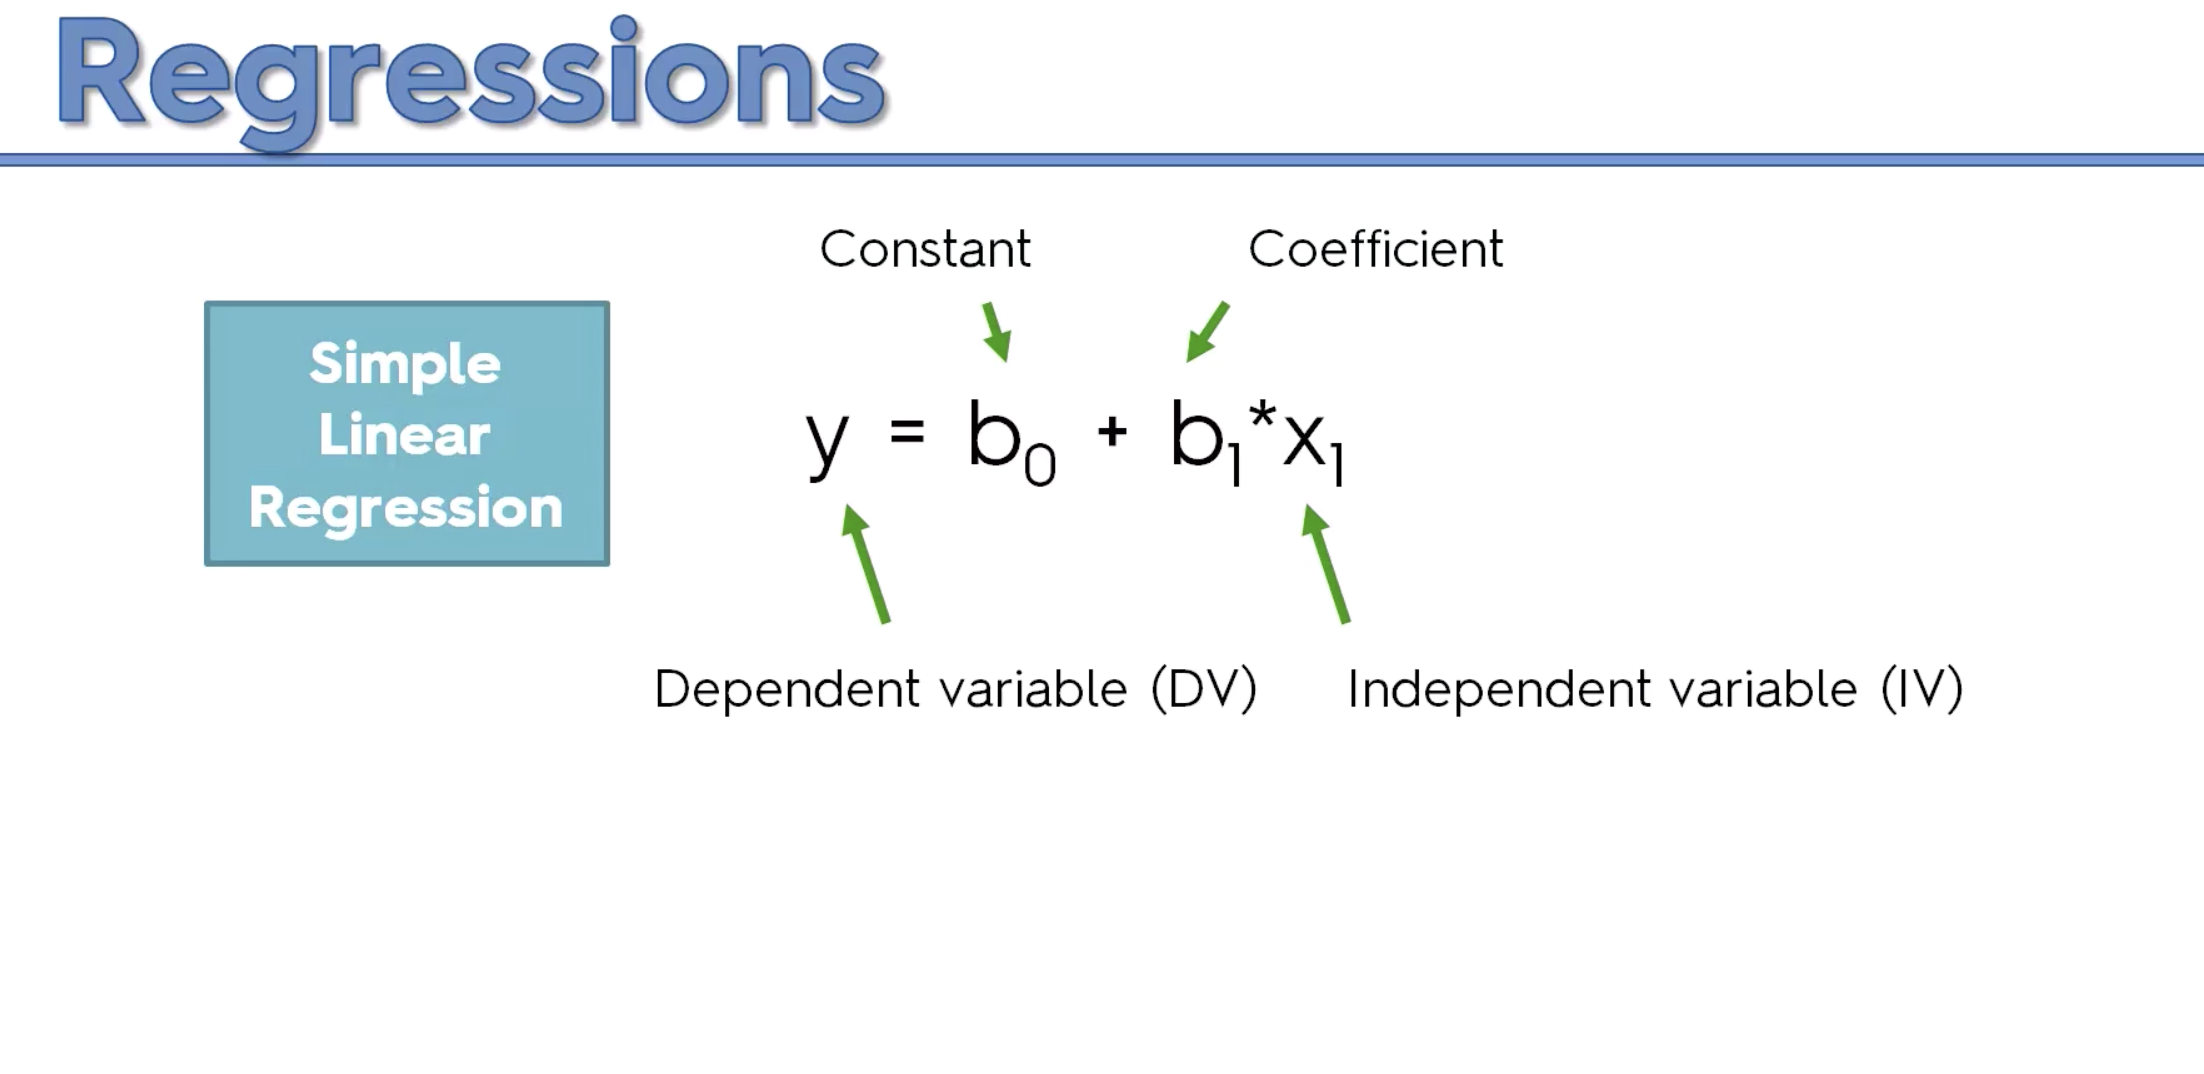

Linear Regression의 목표
- Observation 들을 가장 잘 explain 할수 있는 x와 y의 관계성을 찾는것
- 다른 말로 데이터셋의 현재까지의 분포를 best-fit 하는 line을 찾는것
- best-fitting line을 찾았다면 향후 어떠한 값의 x가 왔을때의 y를 더 정확하게 예측가능
- best-fitting line을 찾는 방법은?

# Ordinary Least Square
- min(SUM(Y - Y')) 
- 모델(line)과 실제 데이터와의 차이를 더한 후, 그 차이가 minimum인 모델을 찾는방법
- 실습으로 진행해 보겠습니다.

### Data Preprocessing

In [10]:
# 이전에 작성한 data_preprocessing_template.py의 코드들을 복사하여 와서 전처리를 진행합니다.
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Salary_Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Feature Scaling - Taken care by LinearRegression Library

In [11]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Fit and predict

In [87]:
#import LinearRegression
from sklearn.linear_model import LinearRegression #import class
regressor = LinearRegression() #instantiate object
regressor.fit(X_train,y_train) #fit on training data (Learning)
y_pred = regressor.predict(X_test) #prediction
regressor.coef_

array([9345.94244312])

# Visualize the result

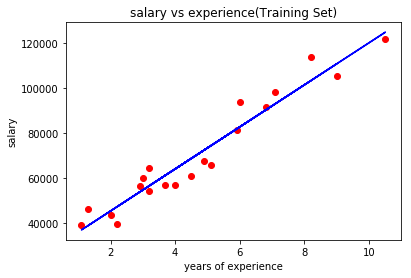

In [15]:
plt.scatter(X_train,y_train,color='red') #observed points
plt.plot(X_train, regressor.predict(X_train),color='blue') #predicted line
plt.title('salary vs experience(Training Set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

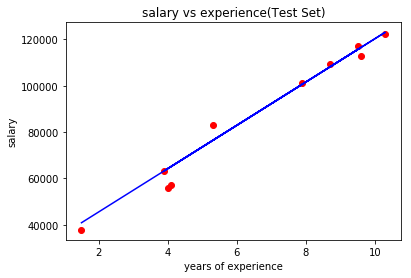

In [16]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.title('salary vs experience(Test Set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

- We should use Simple Linear Regression to predict the winner of a football game (T/F)?

In [99]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, regressor.predict(X))
mse

31577311.6194268

In [117]:

def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta) # this dot is not dot product
    #theta는 (2,1) vector, X는 (30,2) Matrix
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        print(prediction)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y))) 
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

lr =0.01
n_iter = 100

theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,np.c_[y],theta,lr,n_iter)
print('Theta0:          {},\nTheta1:          {}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {}'.format(cost_history[-1]))

[[ -1.74559275]
 [ -2.07086175]
 [ -2.39613075]
 [ -3.20930324]
 [ -3.53457223]
 [ -4.67301372]
 [ -4.83564822]
 [ -5.16091721]
 [ -5.16091721]
 [ -5.9740897 ]
 [ -6.2993587 ]
 [ -6.4619932 ]
 [ -6.4619932 ]
 [ -6.6246277 ]
 [ -7.27516569]
 [ -7.92570368]
 [ -8.25097268]
 [ -8.57624167]
 [ -9.55204866]
 [ -9.71468316]
 [-11.01575914]
 [-11.50366264]
 [-12.80473862]
 [-13.29264211]
 [-14.10581461]
 [-14.5937181 ]
 [-15.40689059]
 [-15.56952509]
 [-16.70796657]
 [-17.03323557]]
[[ 6010.39788147]
 [ 6964.98670247]
 [ 7919.57552347]
 [10306.04757596]
 [11260.63639696]
 [14601.69727045]
 [15078.99168095]
 [16033.58050195]
 [16033.58050195]
 [18420.05255445]
 [19374.64137544]
 [19851.93578594]
 [19851.93578594]
 [20329.23019644]
 [22238.40783844]
 [24147.58548043]
 [25102.17430143]
 [26056.76312243]
 [28920.52958542]
 [29397.82399592]
 [33216.17927991]
 [34648.06251141]
 [38466.4177954 ]
 [39898.30102689]
 [42284.77307939]
 [43716.65631089]
 [46103.12836338]
 [46580.42277388]
 [49921.4836473

array([[ 6482.14292872],
       [12315.49397726]])

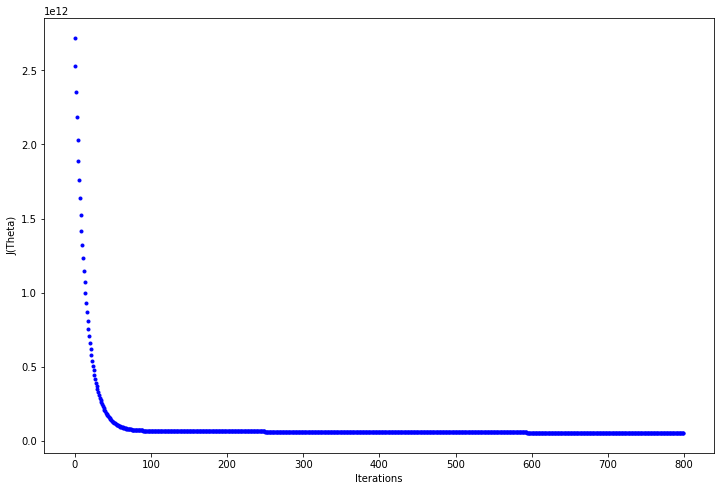

In [79]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [94]:
def plot_GD(n_iter,lr,ax,ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot
    """
    _ = ax.plot(X,np.c_[y],'b.')
    theta = np.random.randn(2,1)
    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,np.c_[y],theta,lr,1)
        pred = X_b.dot(theta)
        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
        if not ax1== None:
            _ = ax1.plot(range(n_iter),cost_history,'b.')
        if i == n_iter-1:
            print(theta)

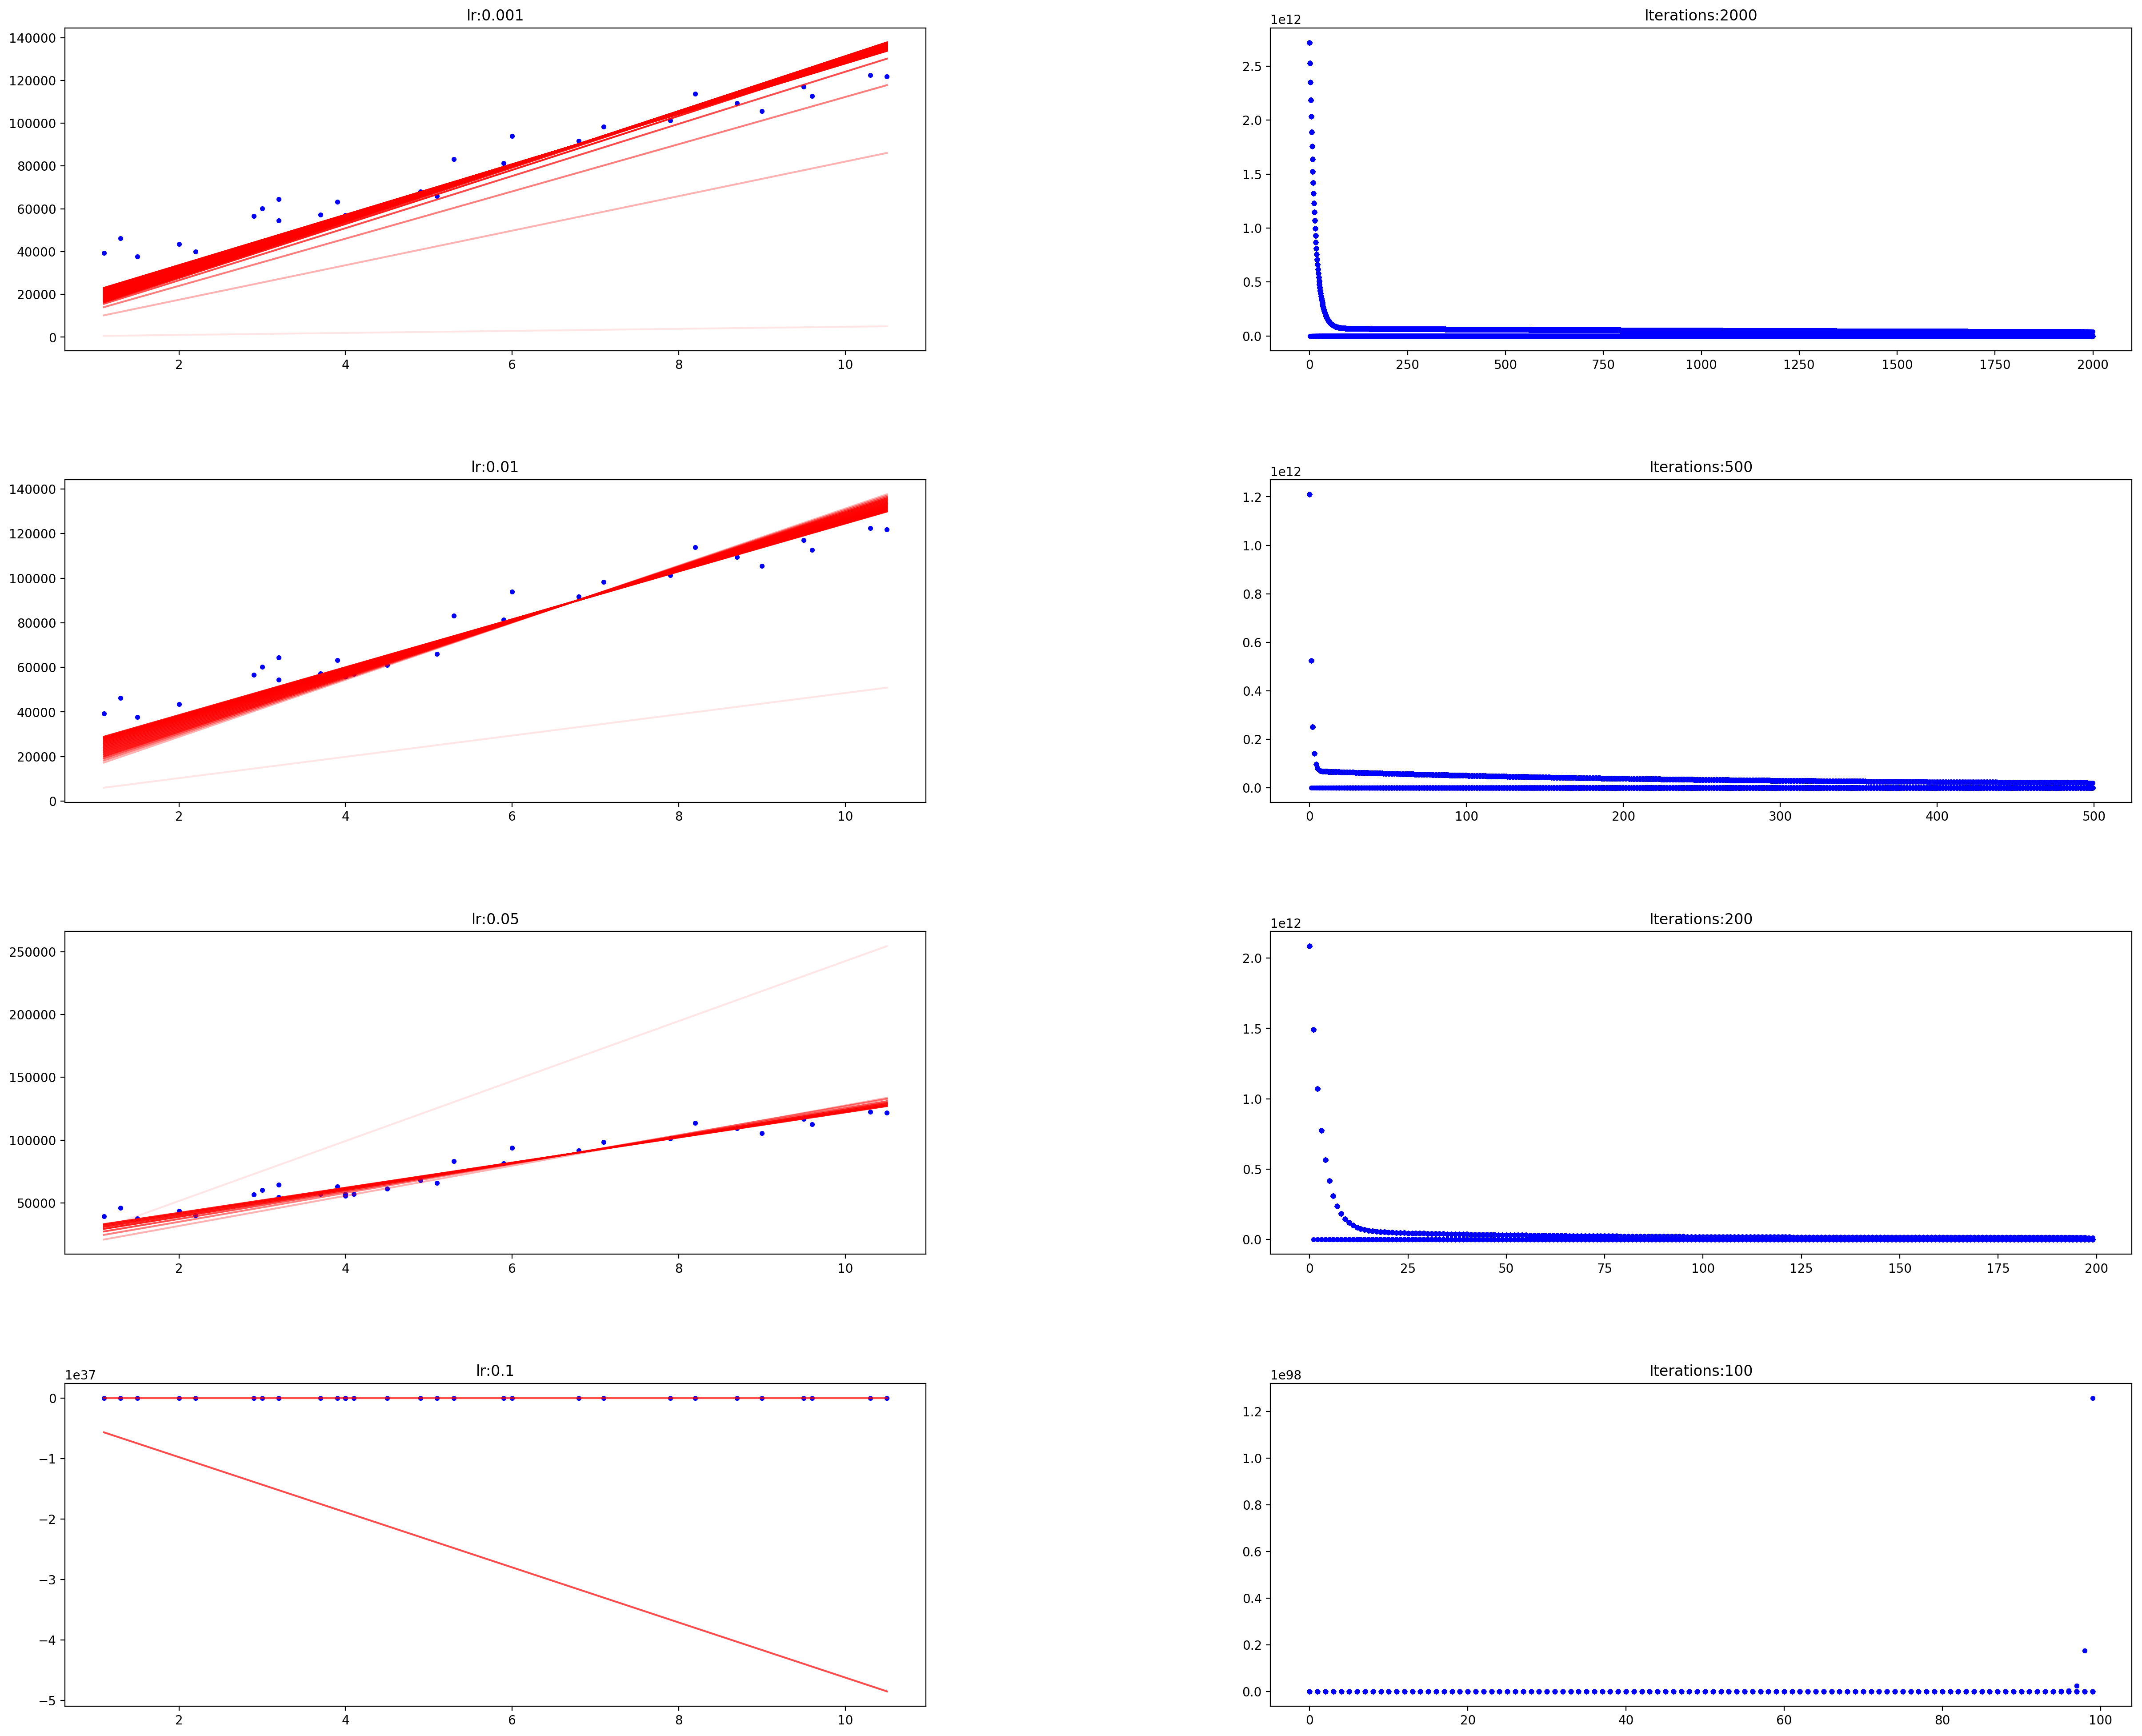

In [85]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

[[ 2915.85825448]
 [12836.39220517]]


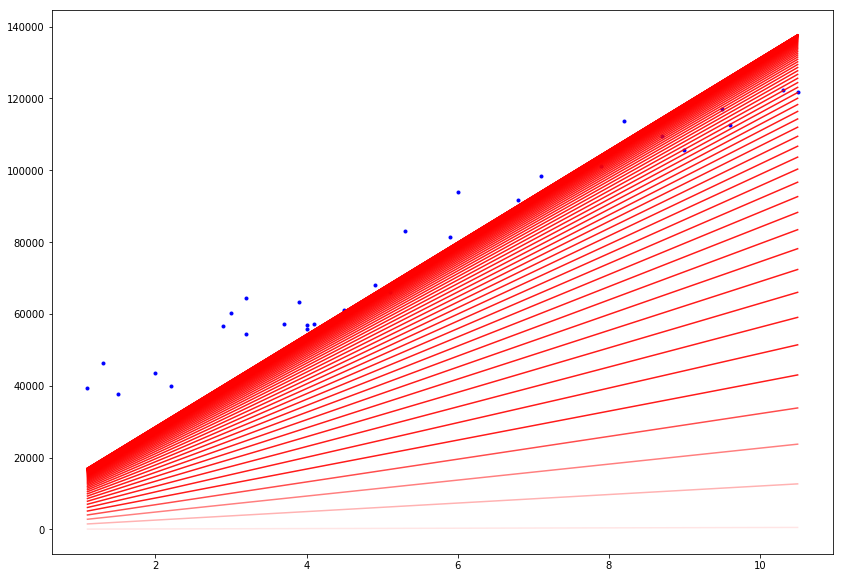

In [95]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(2000,0.0001,ax)

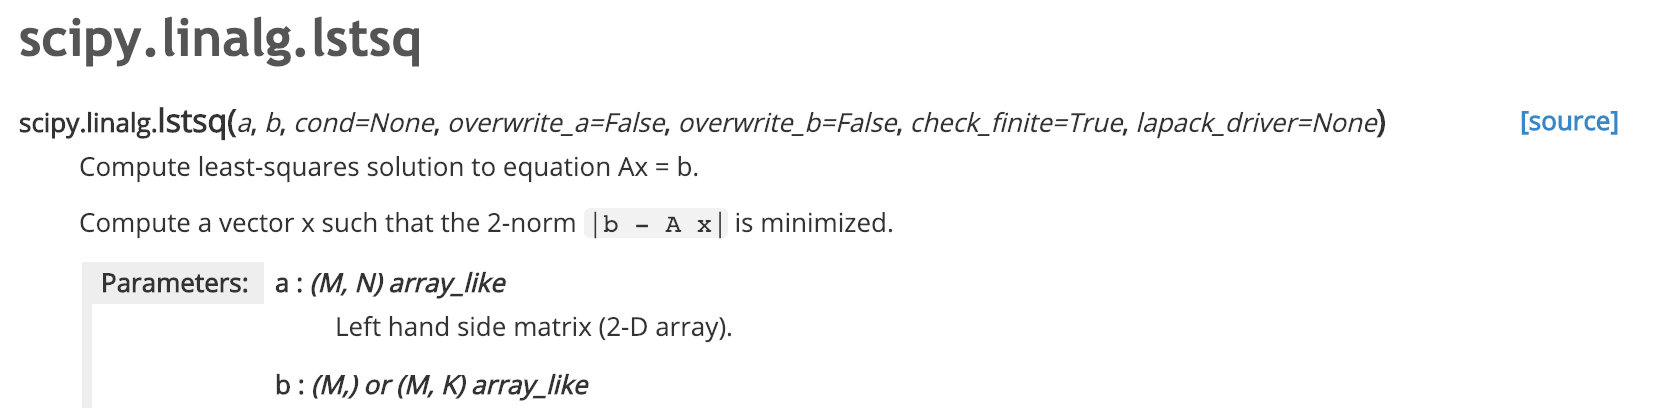
- LinearRegression에서 쓰이는 인터널 파이썬 메소드
- Normal Equation으로도 불리는 방식으로 GD처럼 가중치 반복조절을 필요로 하지 않는다.

### 결론 : Gradient Descent는 scikitlearn.Linear Regression에서 안쓰입니다.
##### 그럼 Ng은 이걸 왜 가르친걸까?
- Machine Learning과 Deep Learning에서 가장 널리 알려진 Optimization 알고리즘이라서
- Iterating이 Matrix Inversion보다 효율적이어서
- 선형적으로 fit되는 데이터 외에 비선형적인 데이터에도 효율적으로 작동하여서
- Logistic Regression에서 자주 쓰이긴 하므로 분류모델 공부할때 더 자세히 알아보면 될것같습니다.
- https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html